___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Flask API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (flask api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Flask API***.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import pyforest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 300)

### Exploratory Data Analysis

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.columns = df.columns.str.strip()
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

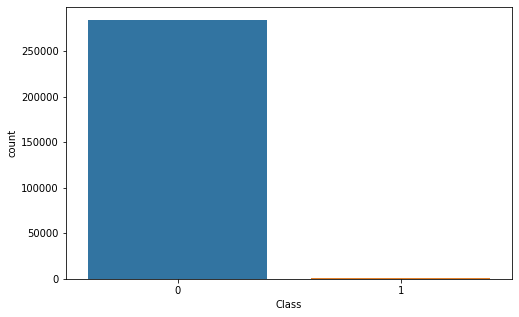

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x = "Class", data=df)

#### Exploratory Data Analysis

Double-click (or enter) to edit

<AxesSubplot:>

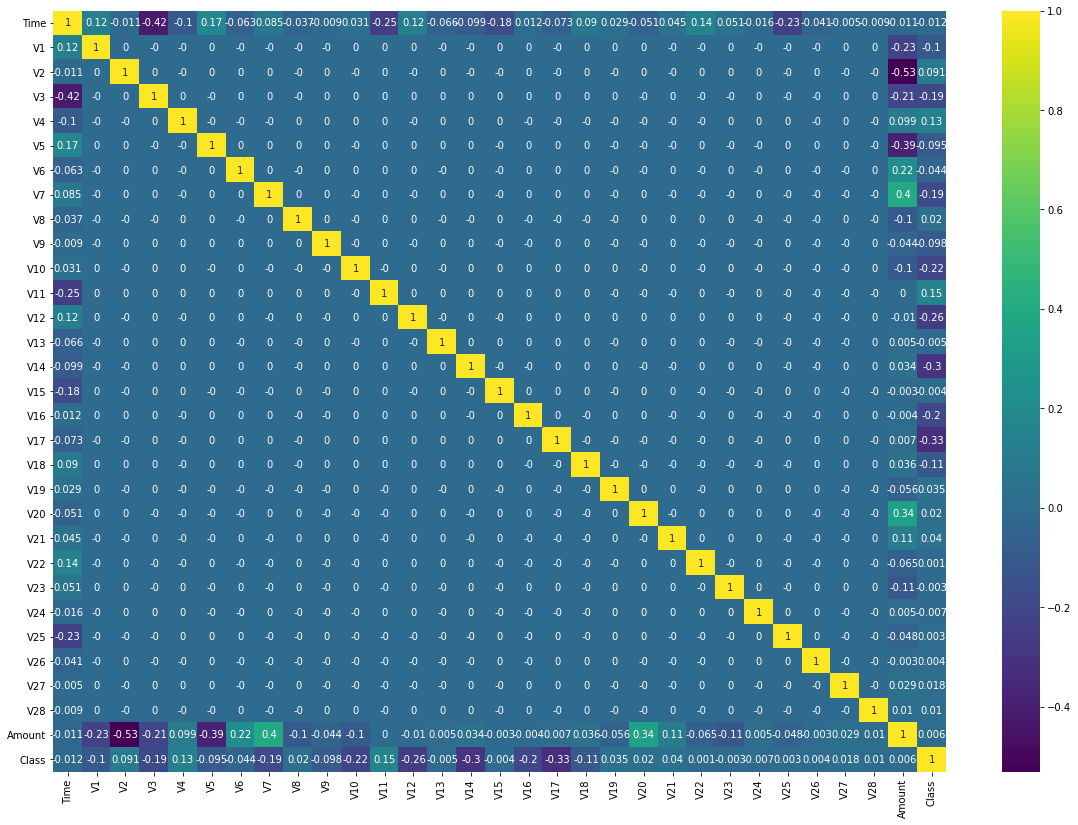

In [10]:
plt.figure(figsize=(20,14))
sns.heatmap(data=df.corr().apply(round,args=(3,)),annot=True, cmap='viridis')

In [11]:
corr_class = df.corr().apply(round,args=(3,))['Class'].sort_values(ascending=False)[1:]
corr_class

V11       0.155
V4        0.133
V2        0.091
V21       0.040
V19       0.035
V8        0.020
V20       0.020
V27       0.018
V28       0.010
Amount    0.006
V26       0.004
V25       0.003
V22       0.001
V23      -0.003
V15      -0.004
V13      -0.005
V24      -0.007
Time     -0.012
V6       -0.044
V5       -0.095
V9       -0.098
V1       -0.101
V18      -0.111
V7       -0.187
V3       -0.193
V16      -0.197
V10      -0.217
V12      -0.261
V14      -0.303
V17      -0.326
Name: Class, dtype: float64

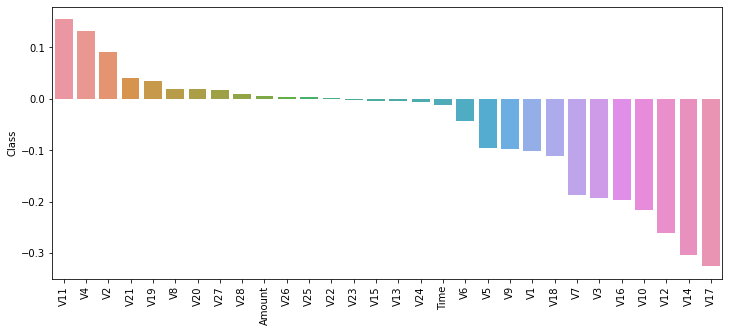

In [12]:
plt.figure(figsize=(12,5))
sns.barplot(x = corr_class.index, y=corr_class)
plt.xticks(rotation=90);

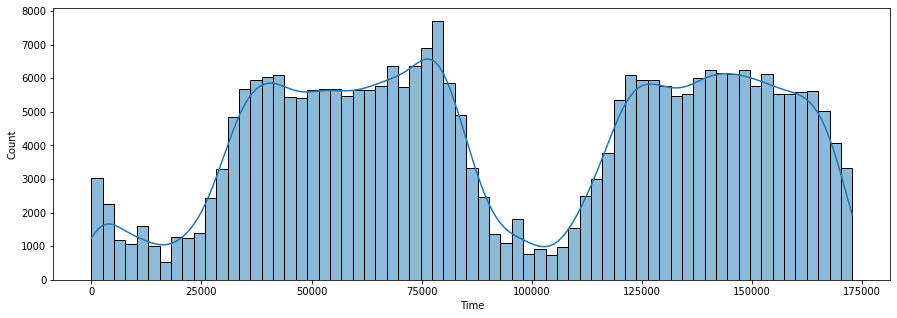

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.histplot(df['Time'], kde=True)
plt.show()

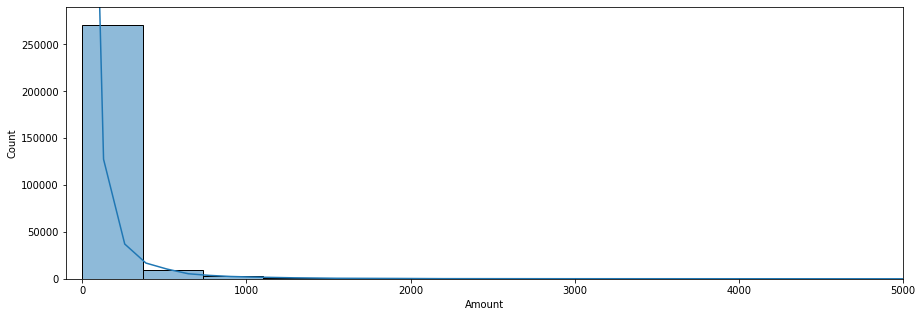

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.histplot(data = df, x='Amount', kde=True, bins=70)
plt.ylim(top=290000)
plt.xlim(left=-100,right=5000)
plt.show()

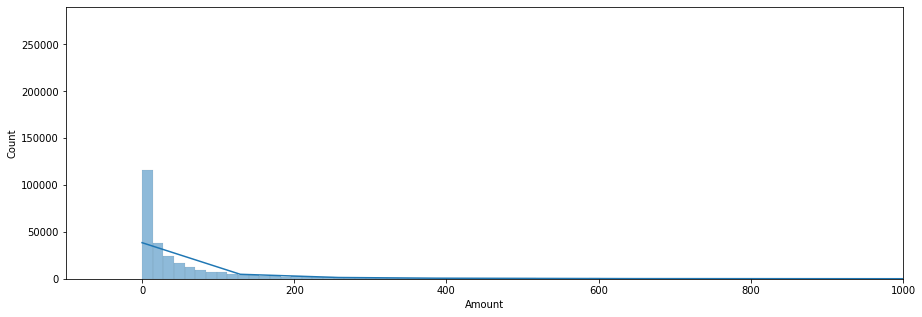

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.histplot(data = df, x='Amount', kde=True, bins = 70, binrange=(0,980))
plt.ylim(top=290000)
plt.xlim(left=-100,right=1000)
plt.show()

### Data Cleaning
Check Missing Values and Outliers

In [16]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
df.isnull().sum().any()

False

In [18]:
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

In [19]:
df[df.Class == 1].duplicated().value_counts()

False    473
True      19
dtype: int64

In [20]:
df[df.Class == 0].duplicated().value_counts()

False    283253
True       1062
dtype: int64

In [21]:
df=df.drop_duplicates()

In [22]:
df.duplicated().value_counts()

False    283726
dtype: int64

In [23]:
print('Columns\t  Q(25-75)\t Q(20-80)\t Q(15-85)\t Q(10-90)\t Q(5-95)')
for col in df.columns[:-1]:
    print("{}\t: {}\t {}\t\t {}\t\t {}\t\t {}".format(col, len(df[(df[col] < df[col].quantile(0.25)) | (df[col] > df[col].quantile(0.75))]),\
                                                len(df[(df[col] < df[col].quantile(0.20)) | (df[col] > df[col].quantile(0.80))]),\
                                                len(df[(df[col] < df[col].quantile(0.15)) | (df[col] > df[col].quantile(0.85))]),\
                                                len(df[(df[col] < df[col].quantile(0.10)) | (df[col] > df[col].quantile(0.90))]),\
                                                len(df[(df[col] < df[col].quantile(0.05)) | (df[col] > df[col].quantile(0.95))]),\
                                               ))

Columns	  Q(25-75)	 Q(20-80)	 Q(15-85)	 Q(10-90)	 Q(5-95)
Time	: 141863	 113487		 85116		 56743		 28372
V1	: 141864	 113490		 85118		 56746		 28374
V2	: 141864	 113490		 85117		 56746		 28374
V3	: 141864	 113490		 85118		 56745		 28373
V4	: 141864	 113490		 85118		 56746		 28374
V5	: 141864	 113490		 85118		 56746		 28374
V6	: 141864	 113490		 85118		 56745		 28374
V7	: 141864	 113490		 85118		 56746		 28374
V8	: 141864	 113490		 85118		 56746		 28373
V9	: 141864	 113490		 85118		 56746		 28374
V10	: 141864	 113489		 85118		 56746		 28374
V11	: 141864	 113490		 85118		 56746		 28374
V12	: 141864	 113490		 85118		 56746		 28374
V13	: 141864	 113490		 85118		 56745		 28374
V14	: 141863	 113490		 85118		 56746		 28374
V15	: 141864	 113490		 85118		 56746		 28374
V16	: 141864	 113490		 85118		 56746		 28374
V17	: 141864	 113490		 85118		 56746		 28374
V18	: 141864	 113490		 85118		 56735		 28374
V19	: 141864	 113490		 85118		 56744		 28374
V20	: 141864	 113490		 85118		 56746		 28374
V21	:

In [24]:
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import stats

In [25]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = stats.zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                   np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile_threshold)

In [26]:
def outlier_inspect(df, col, min_z = 1, max_z = 5, step = 0.05, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.histplot(data = df, x = col, kde=False, bins = 50)
    else :
        sns.histplot(data = df[df[col]<=max_hist], x = col, kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(data = df, x = col)
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z = min_z, max_z = max_z, step = step)
    plt.show()

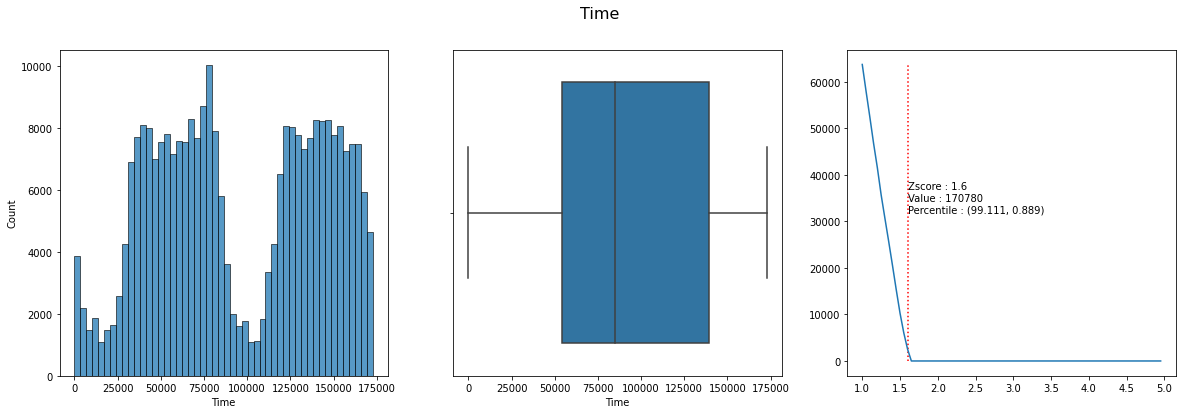

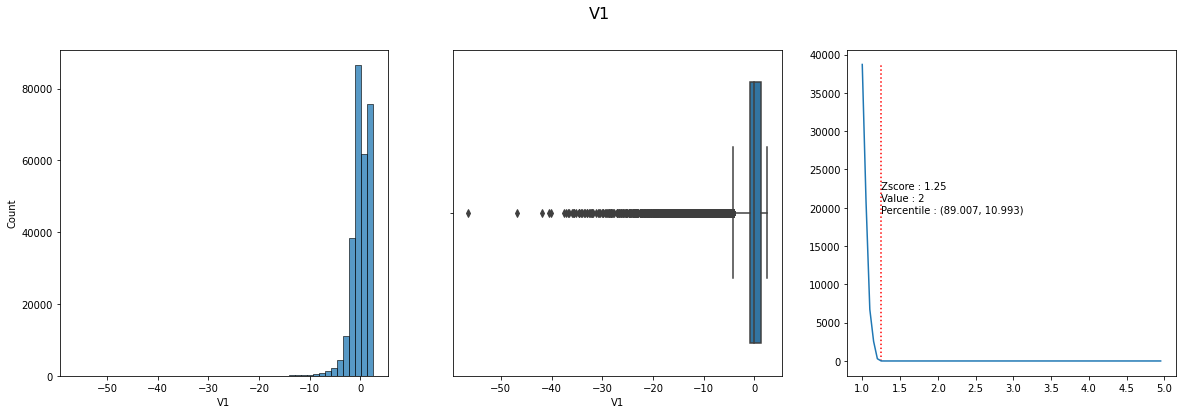

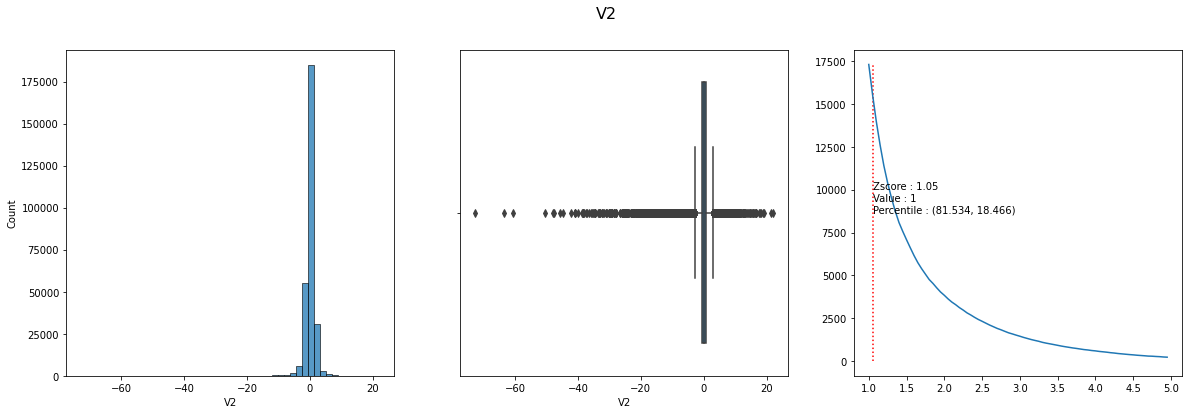

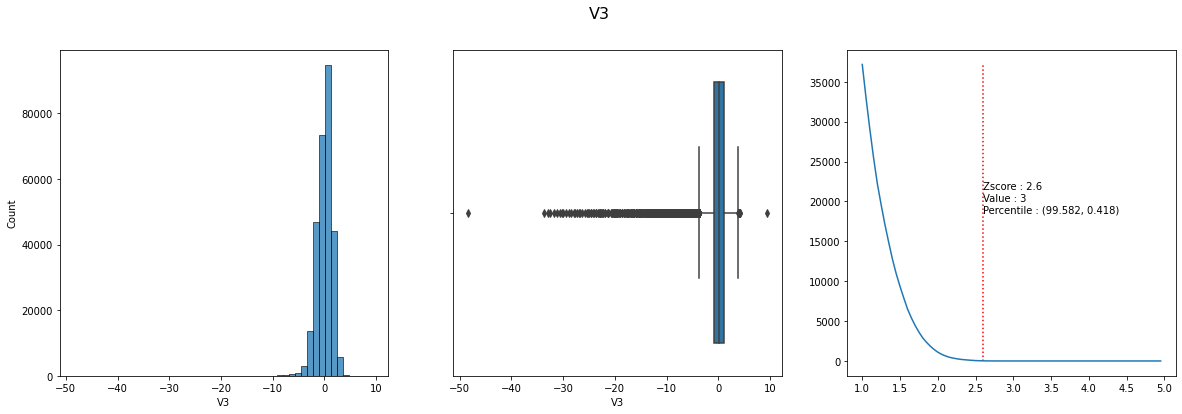

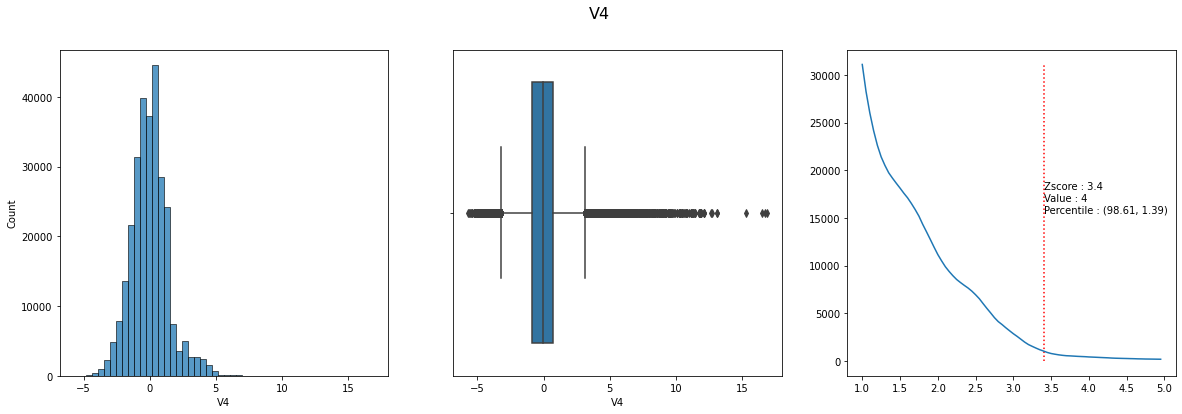

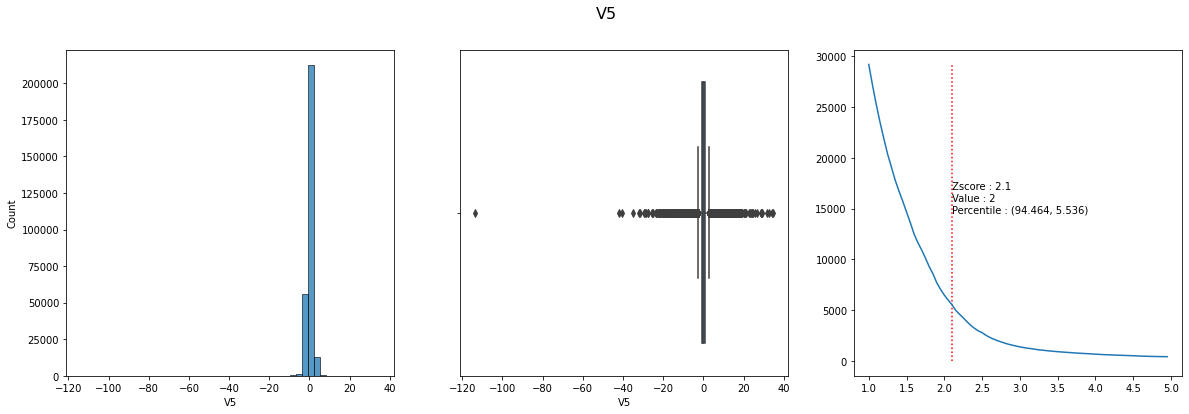

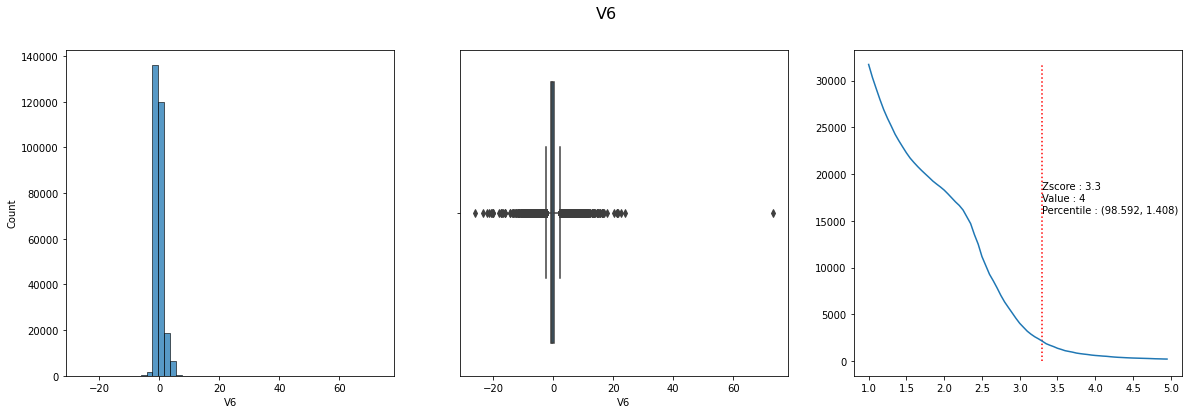

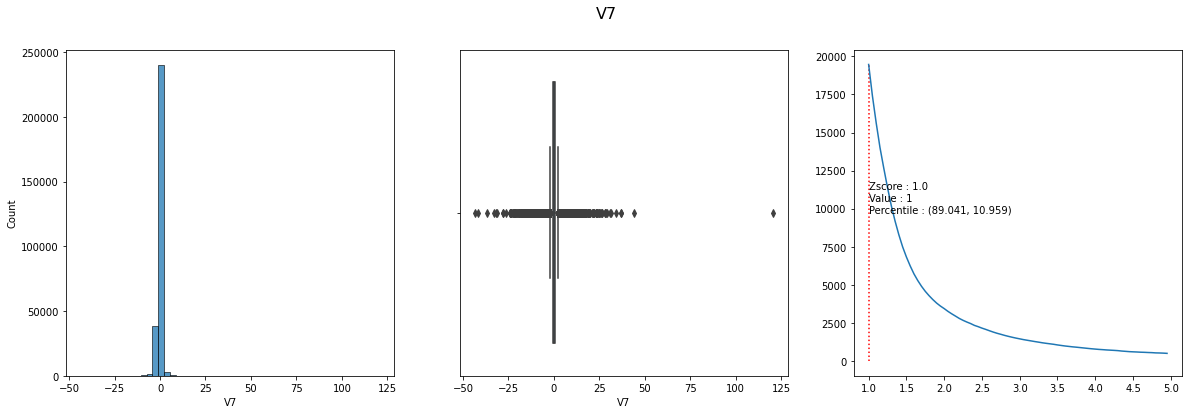

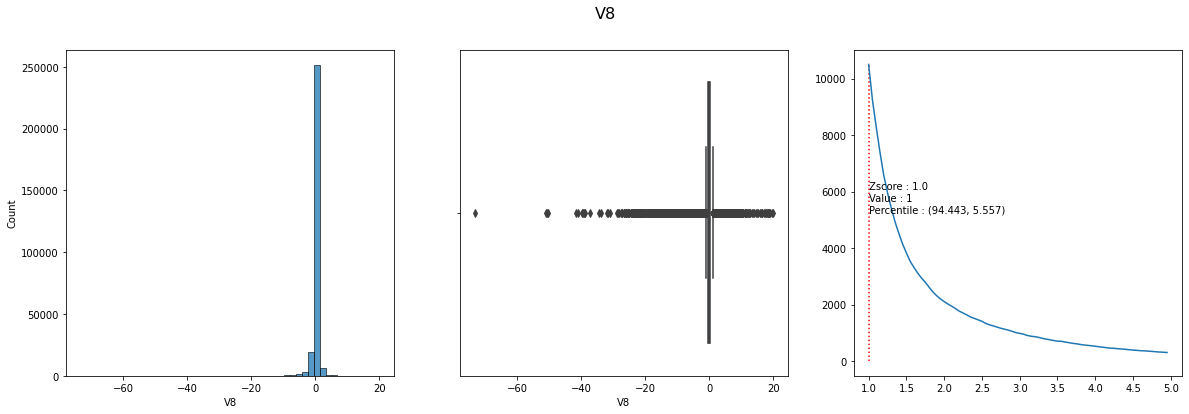

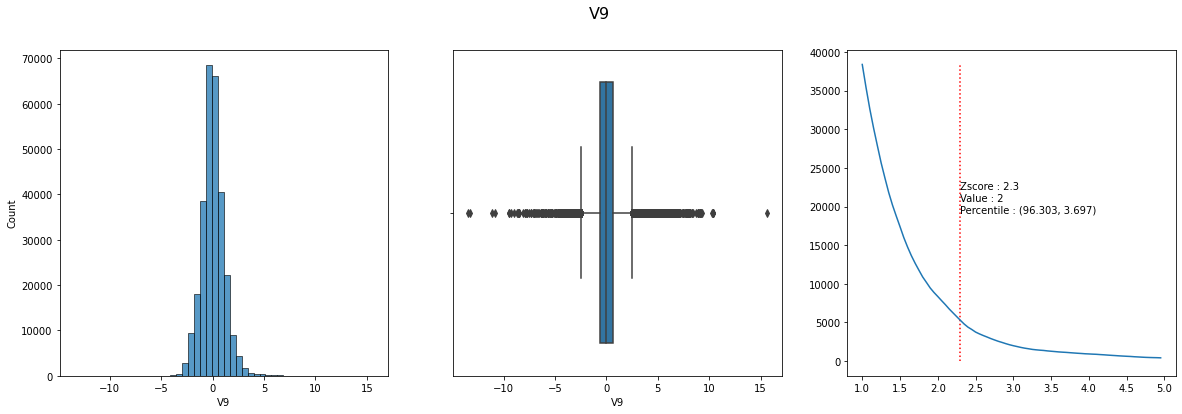

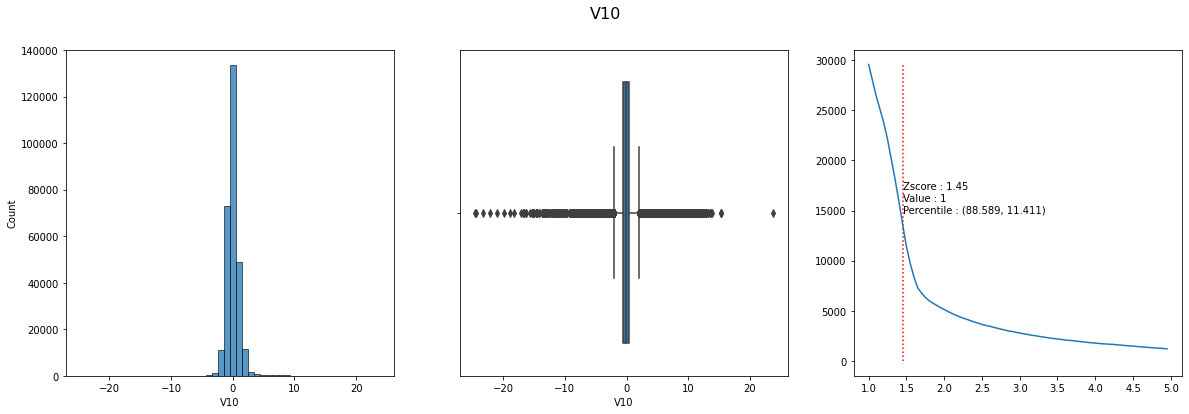

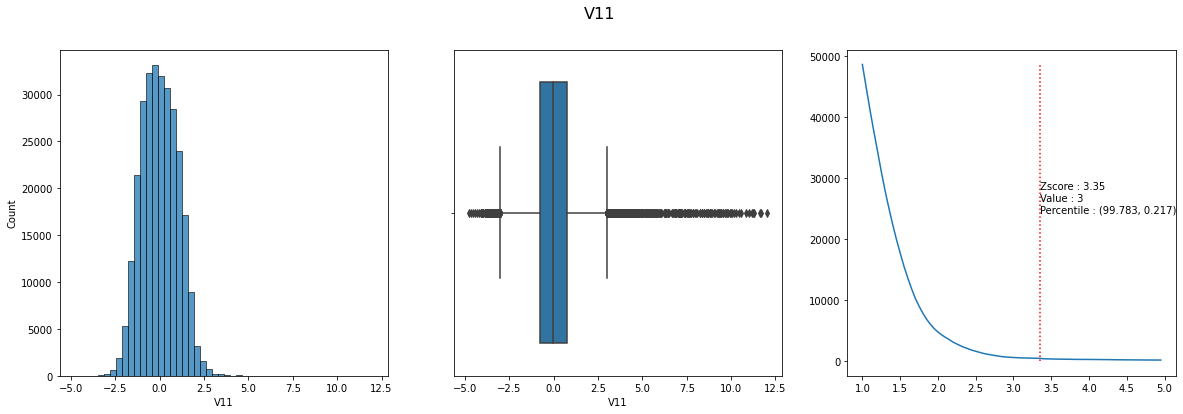

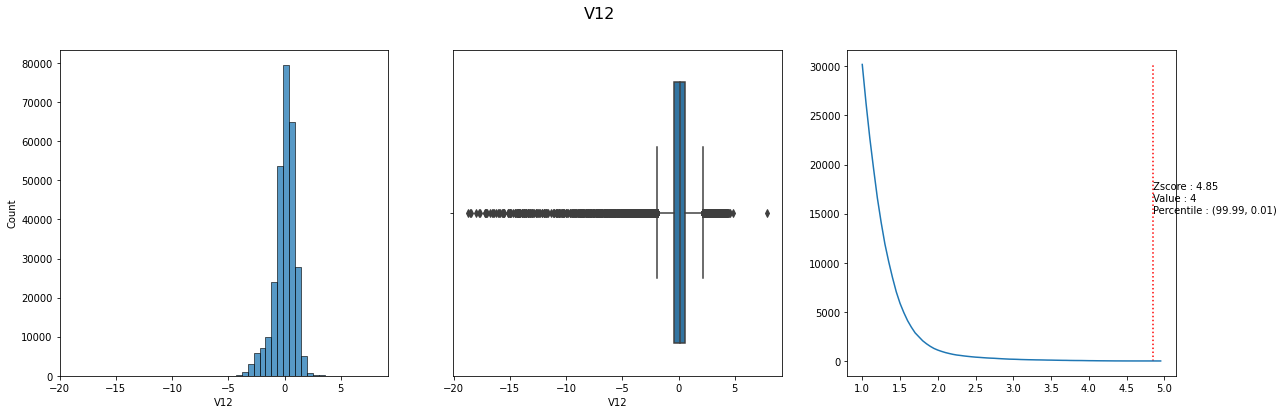

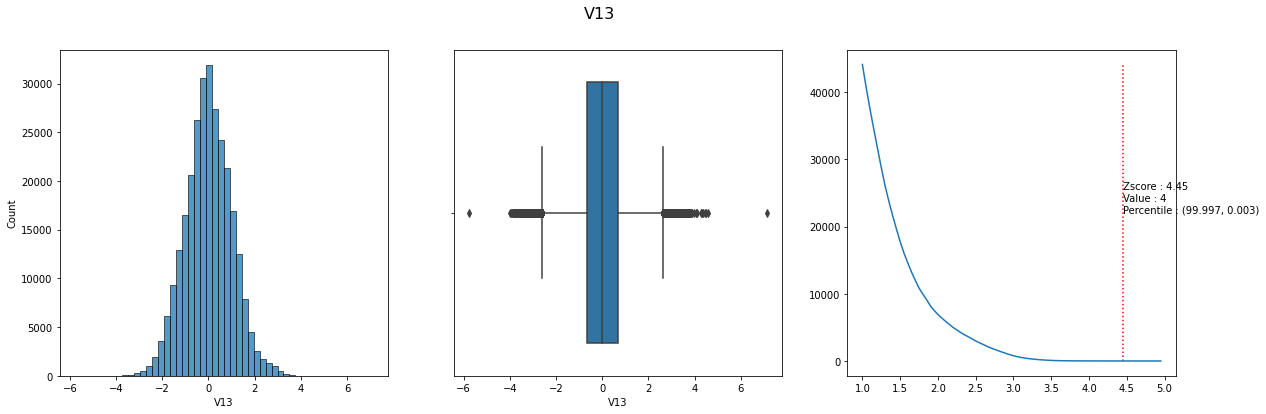

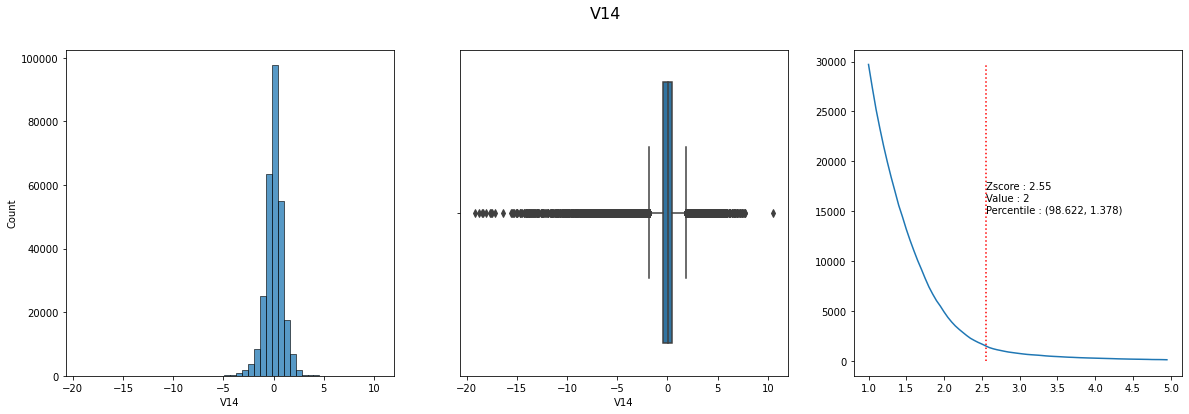

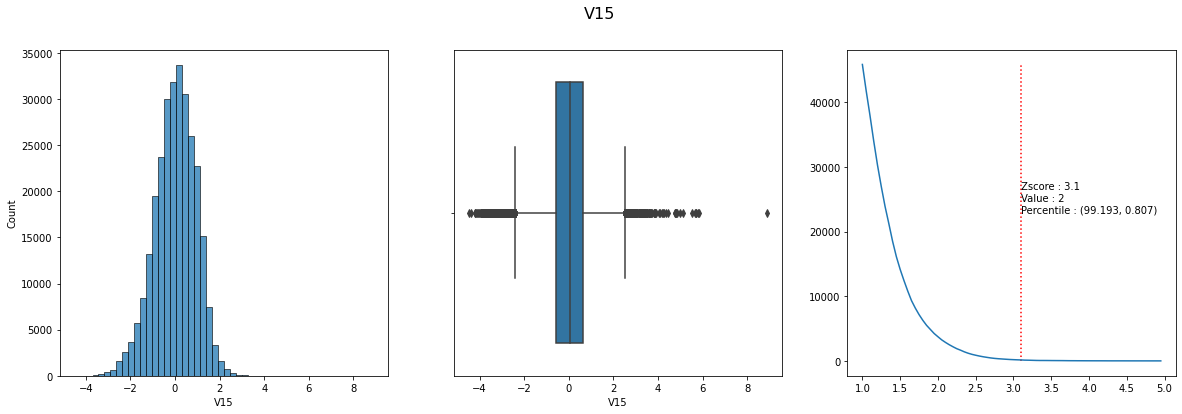

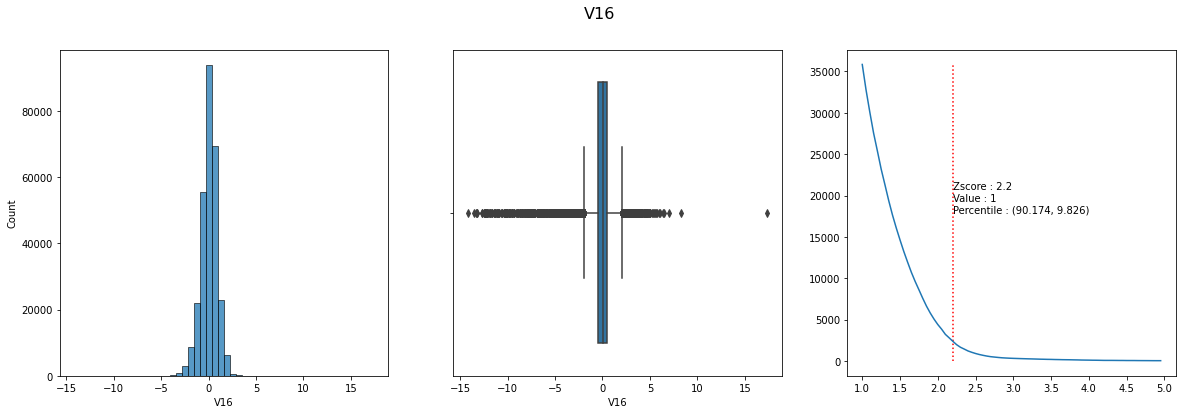

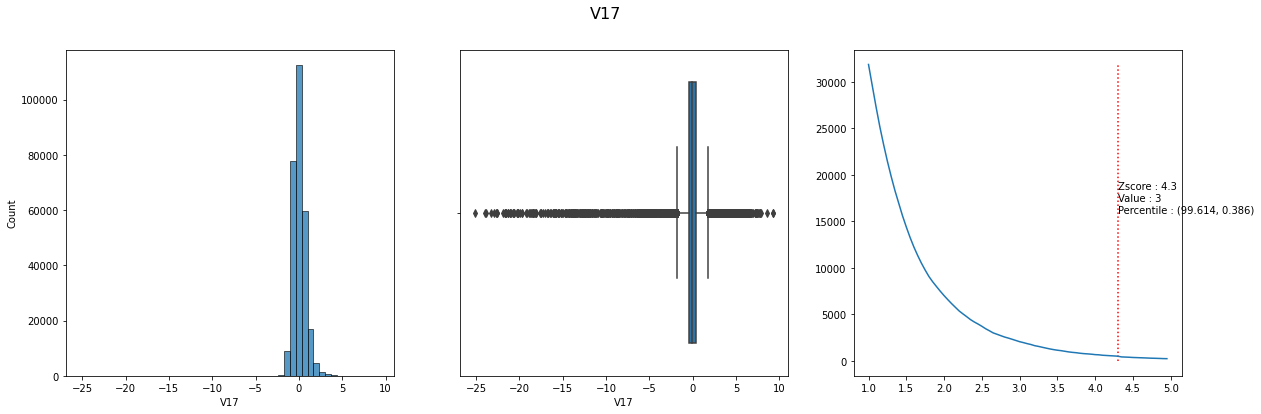

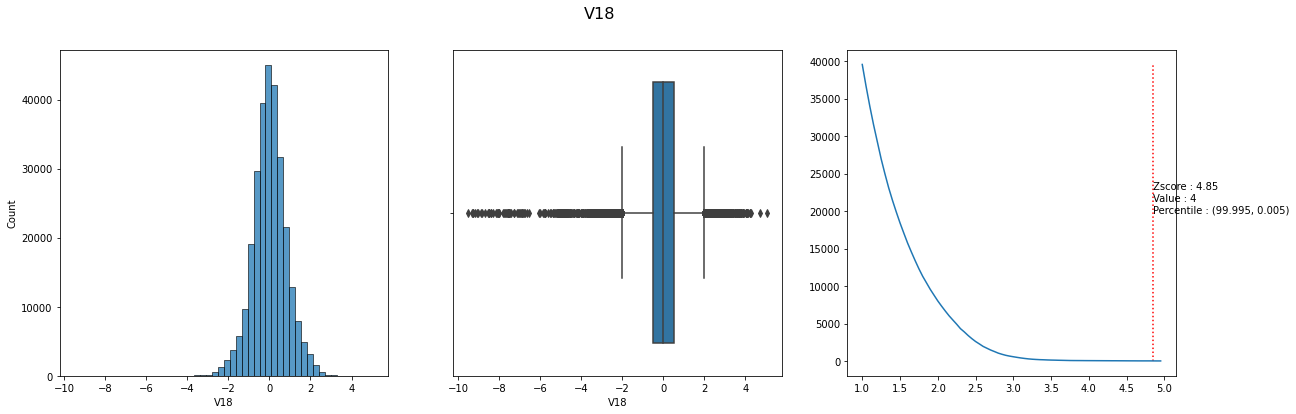

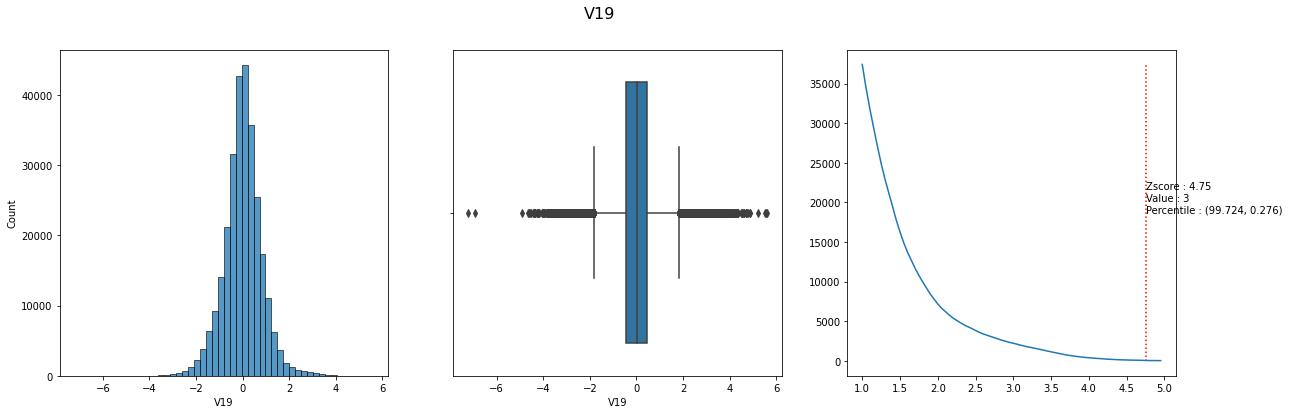

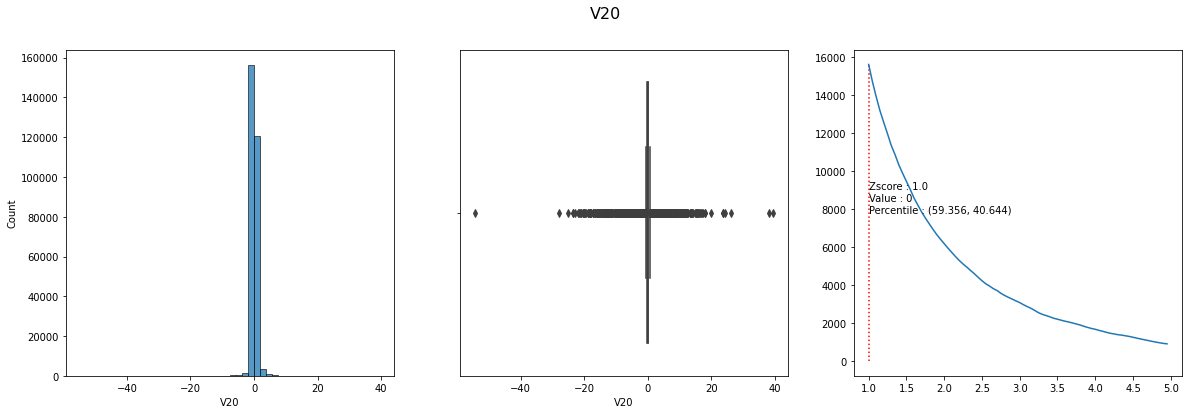

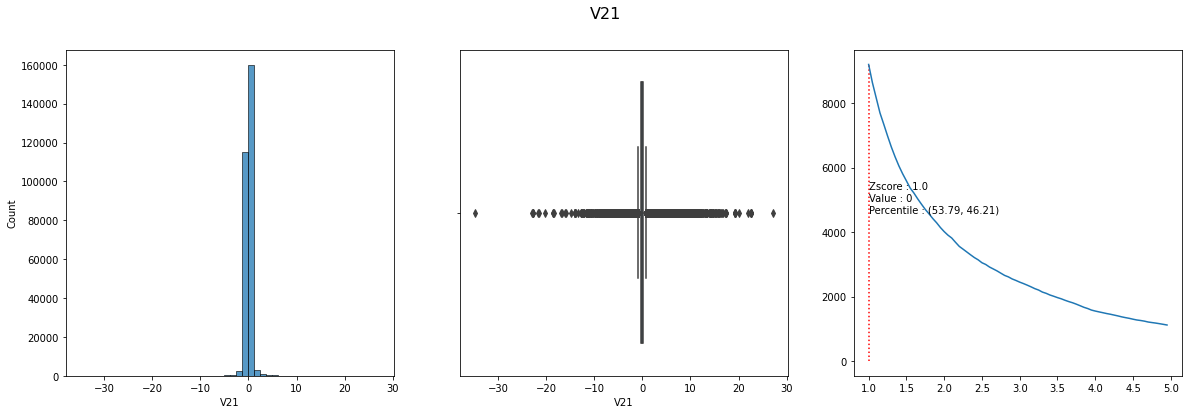

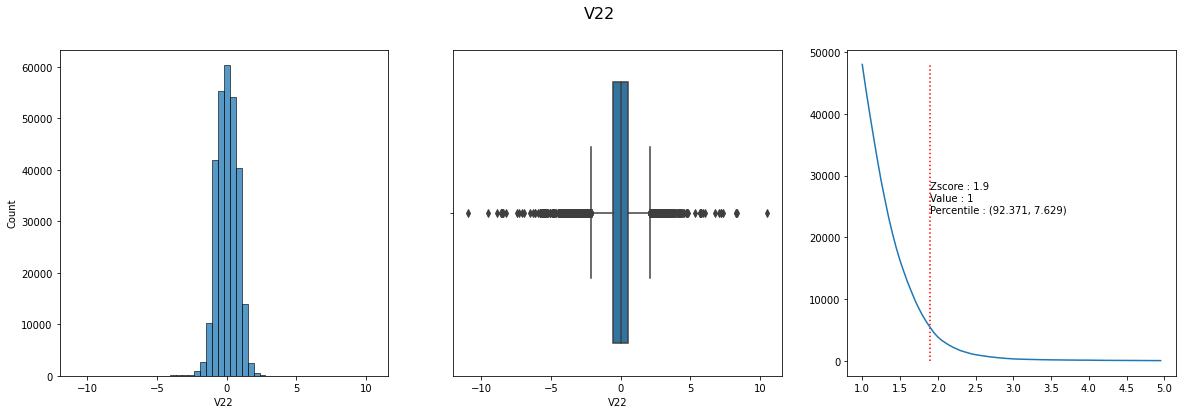

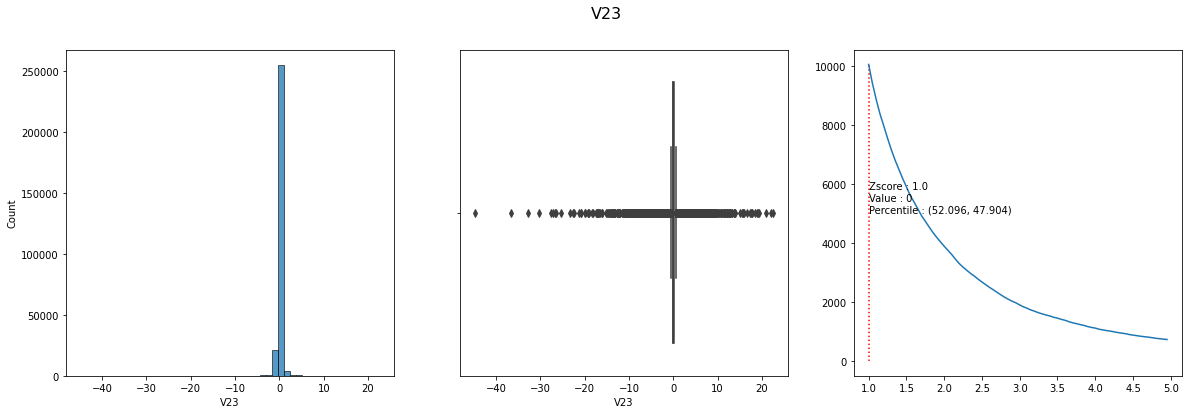

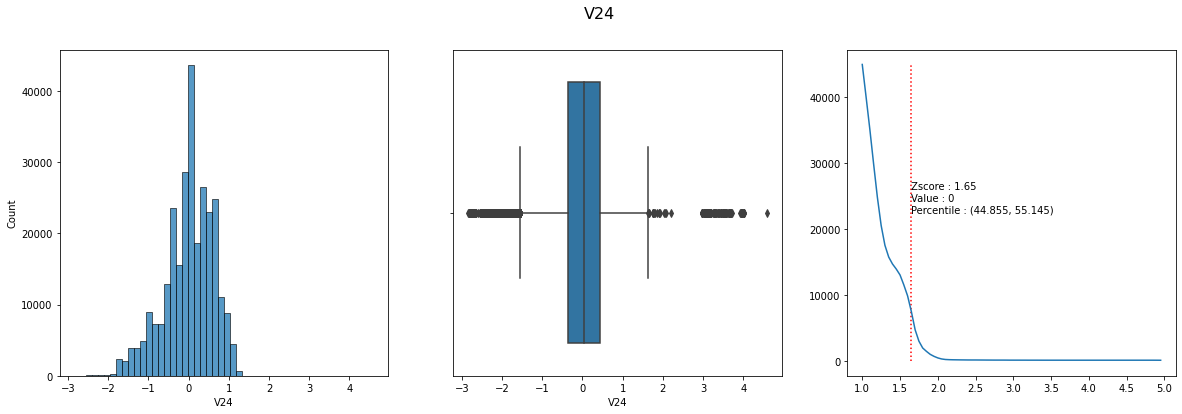

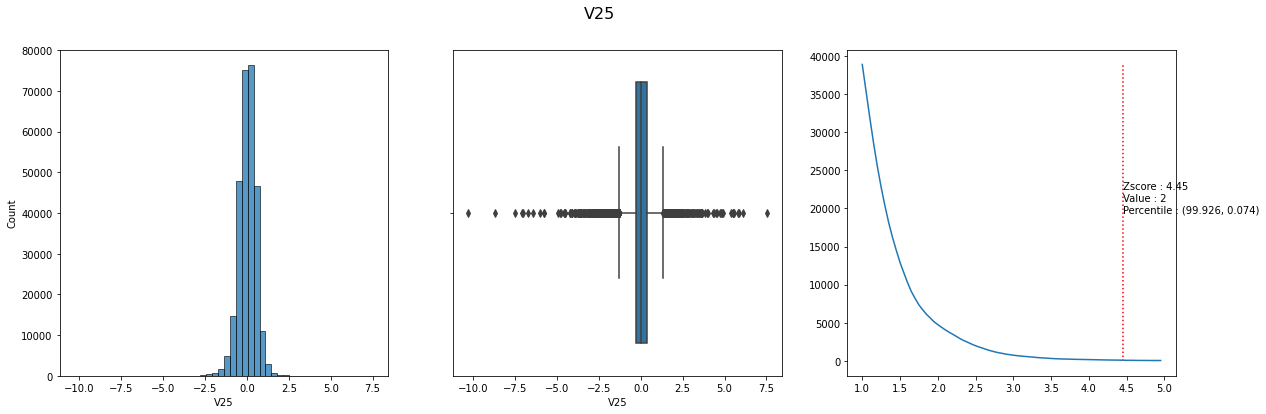

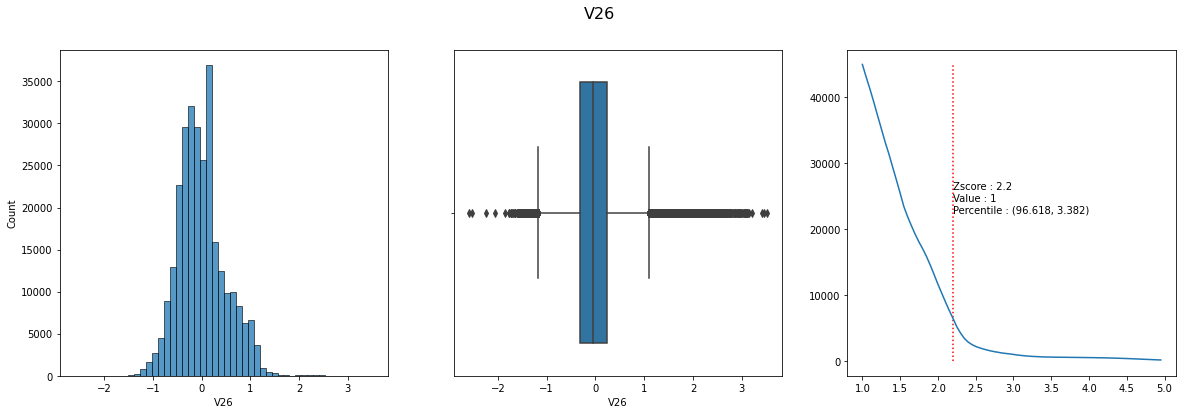

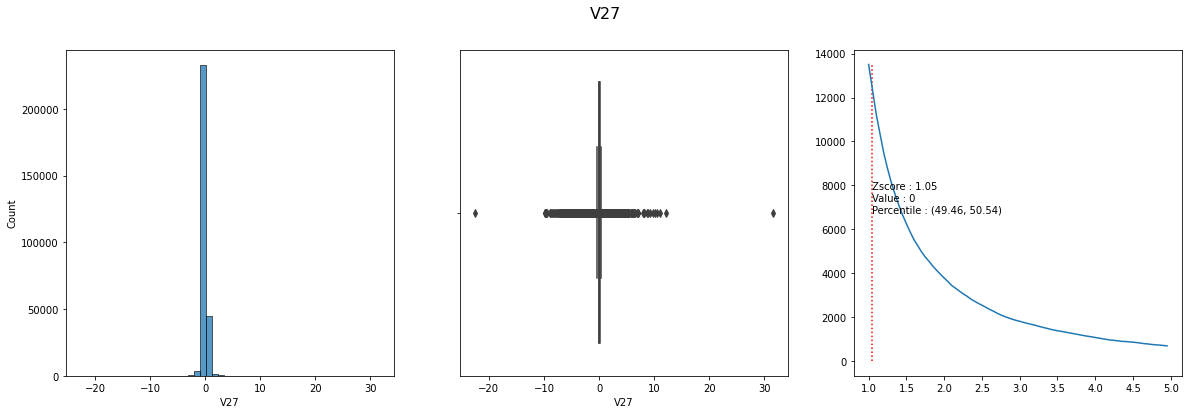

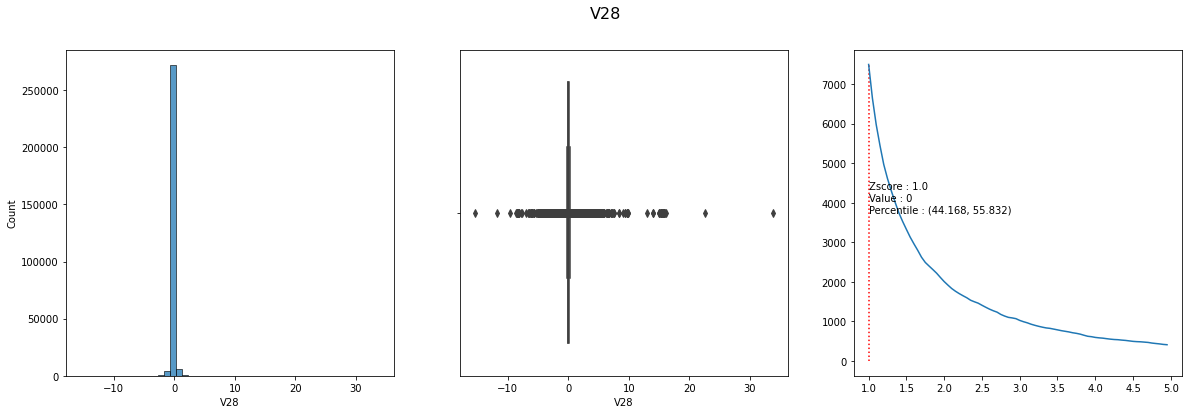

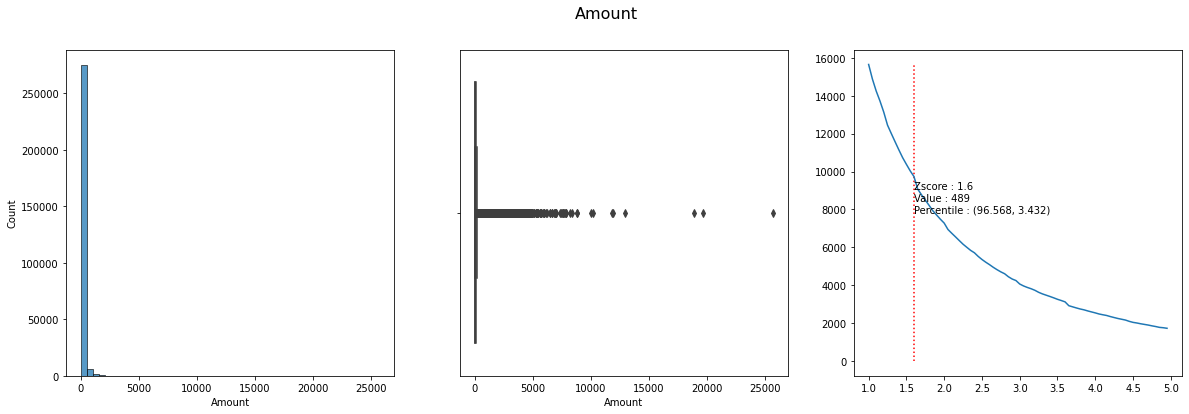

In [27]:
for col in df.columns[:-1]:
    outlier_inspect(df, col, bins=80)   

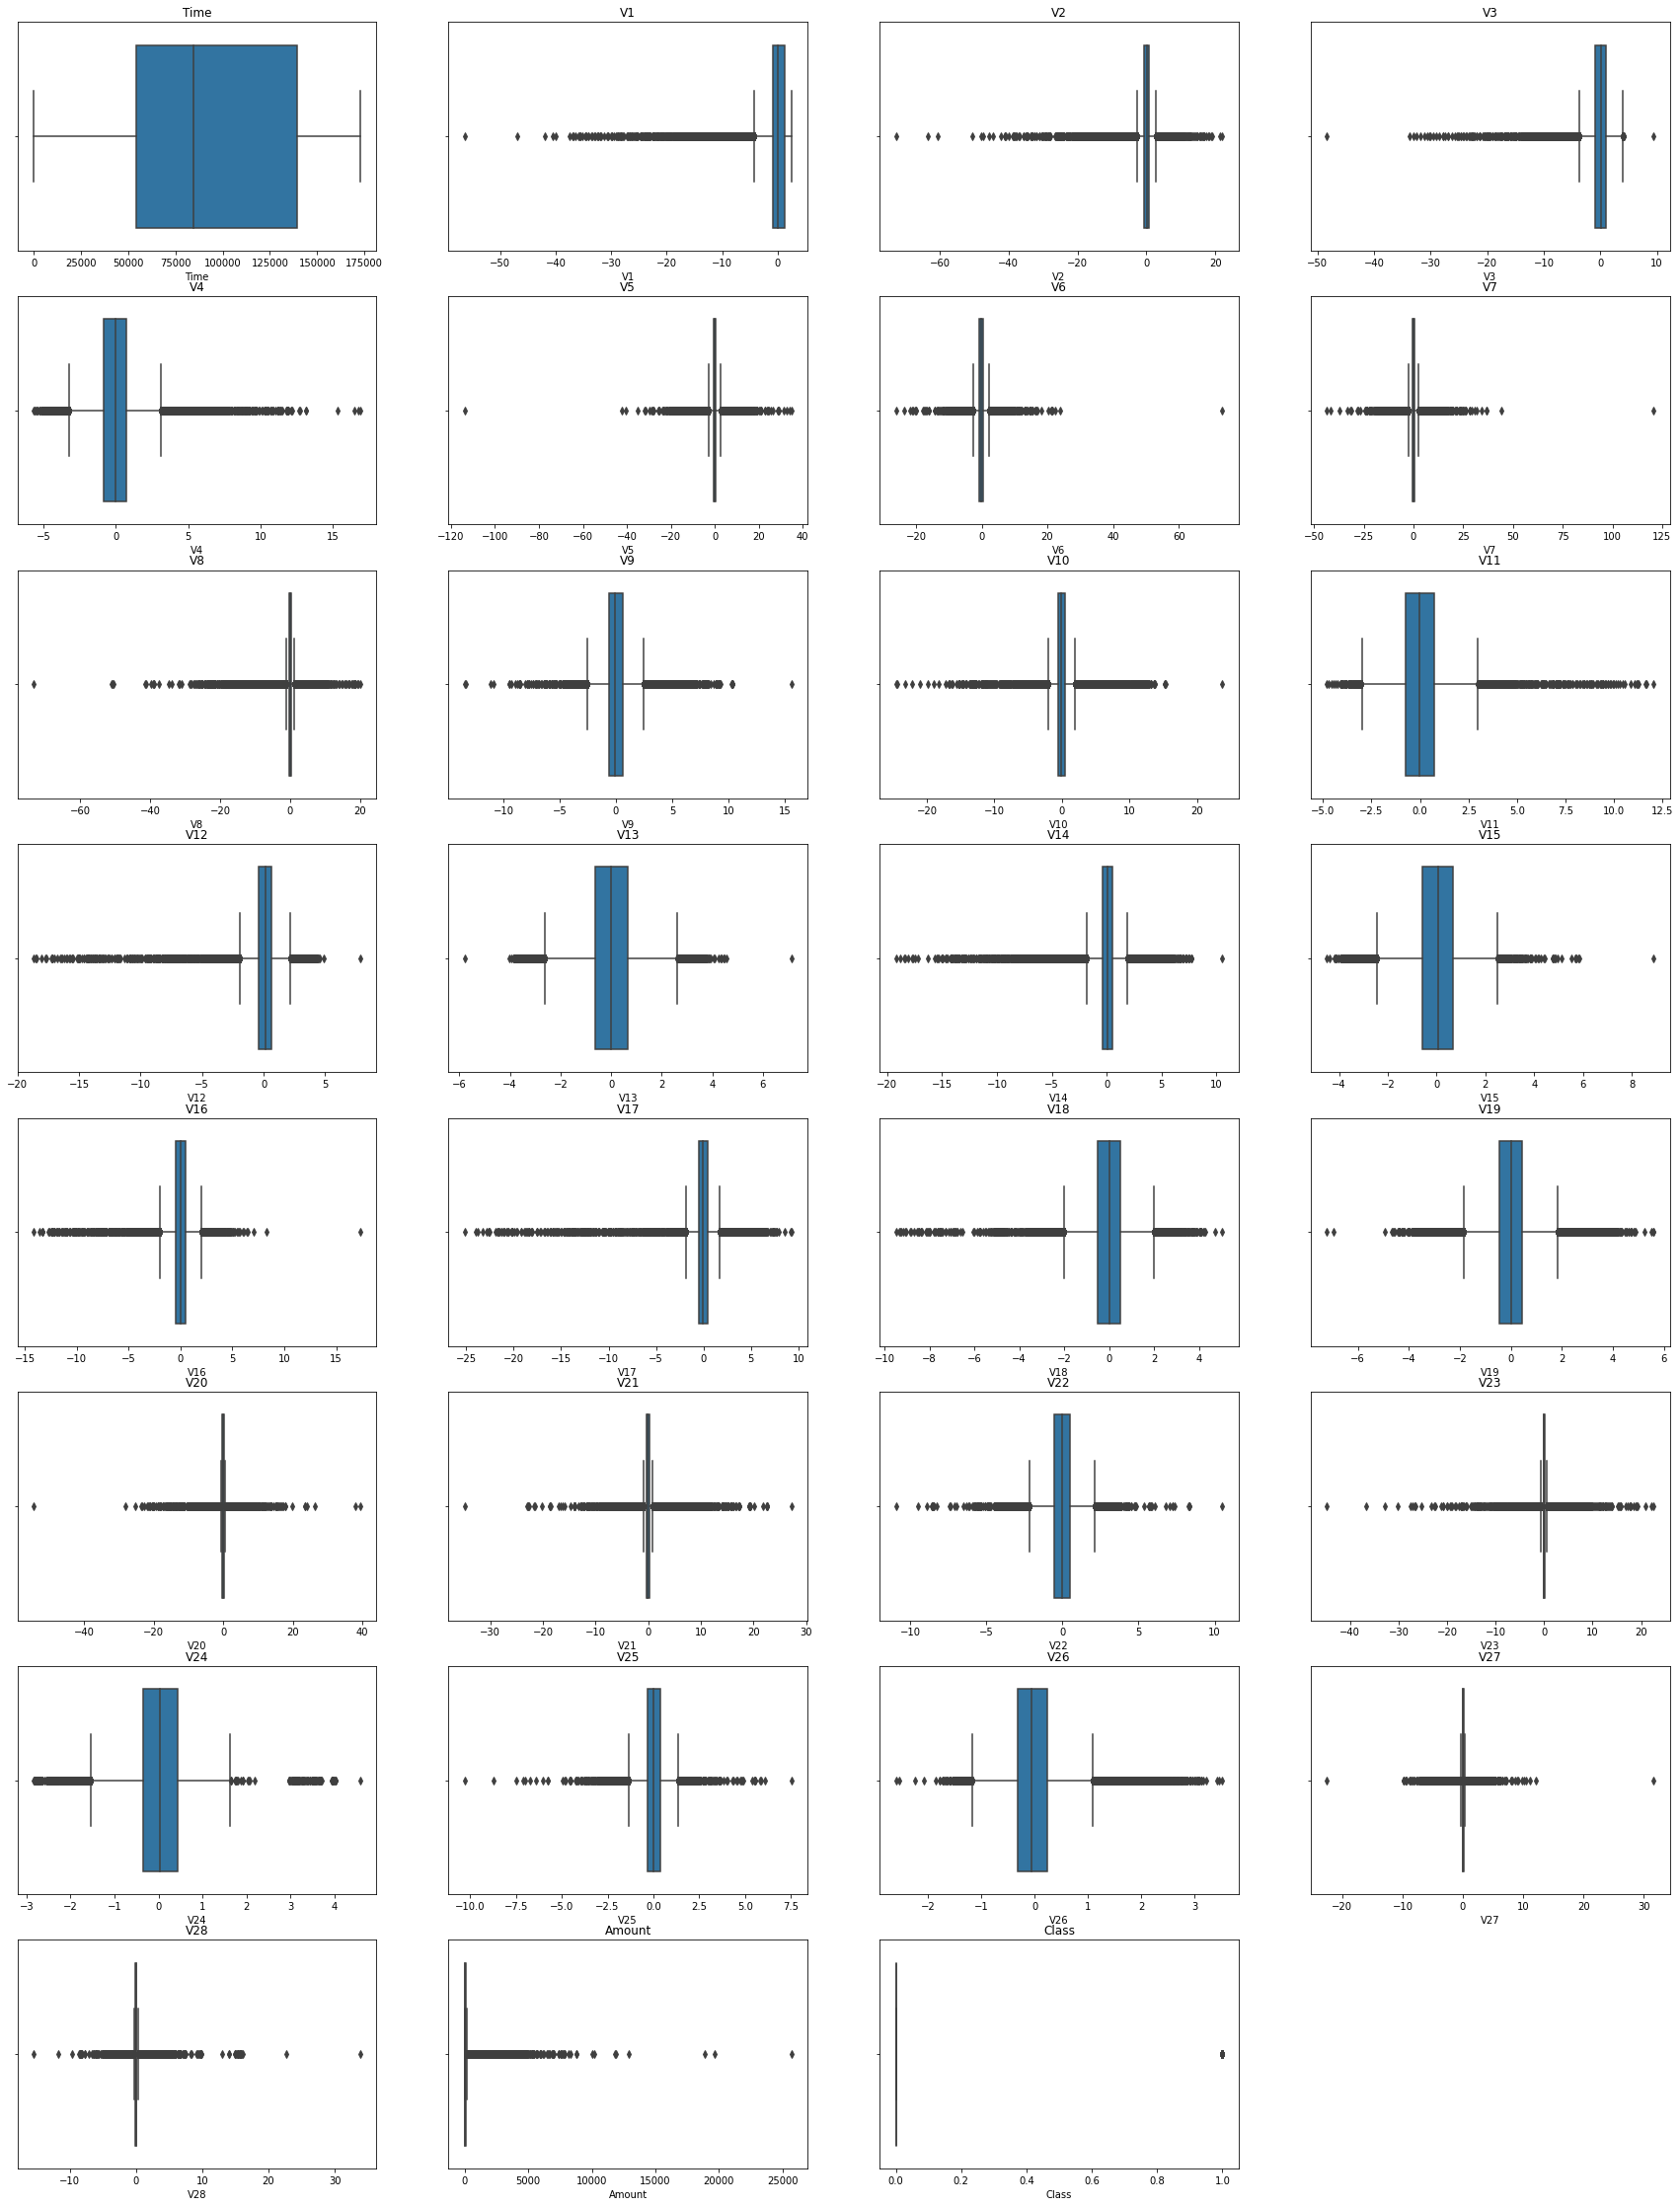

In [28]:
plt.figure(figsize=(30,40))
for i in range(len(df.columns)):    
    plt.subplot(8,4,i+1)
    sns.boxplot(df.iloc[:,i])
    plt.title(df.columns[i]);

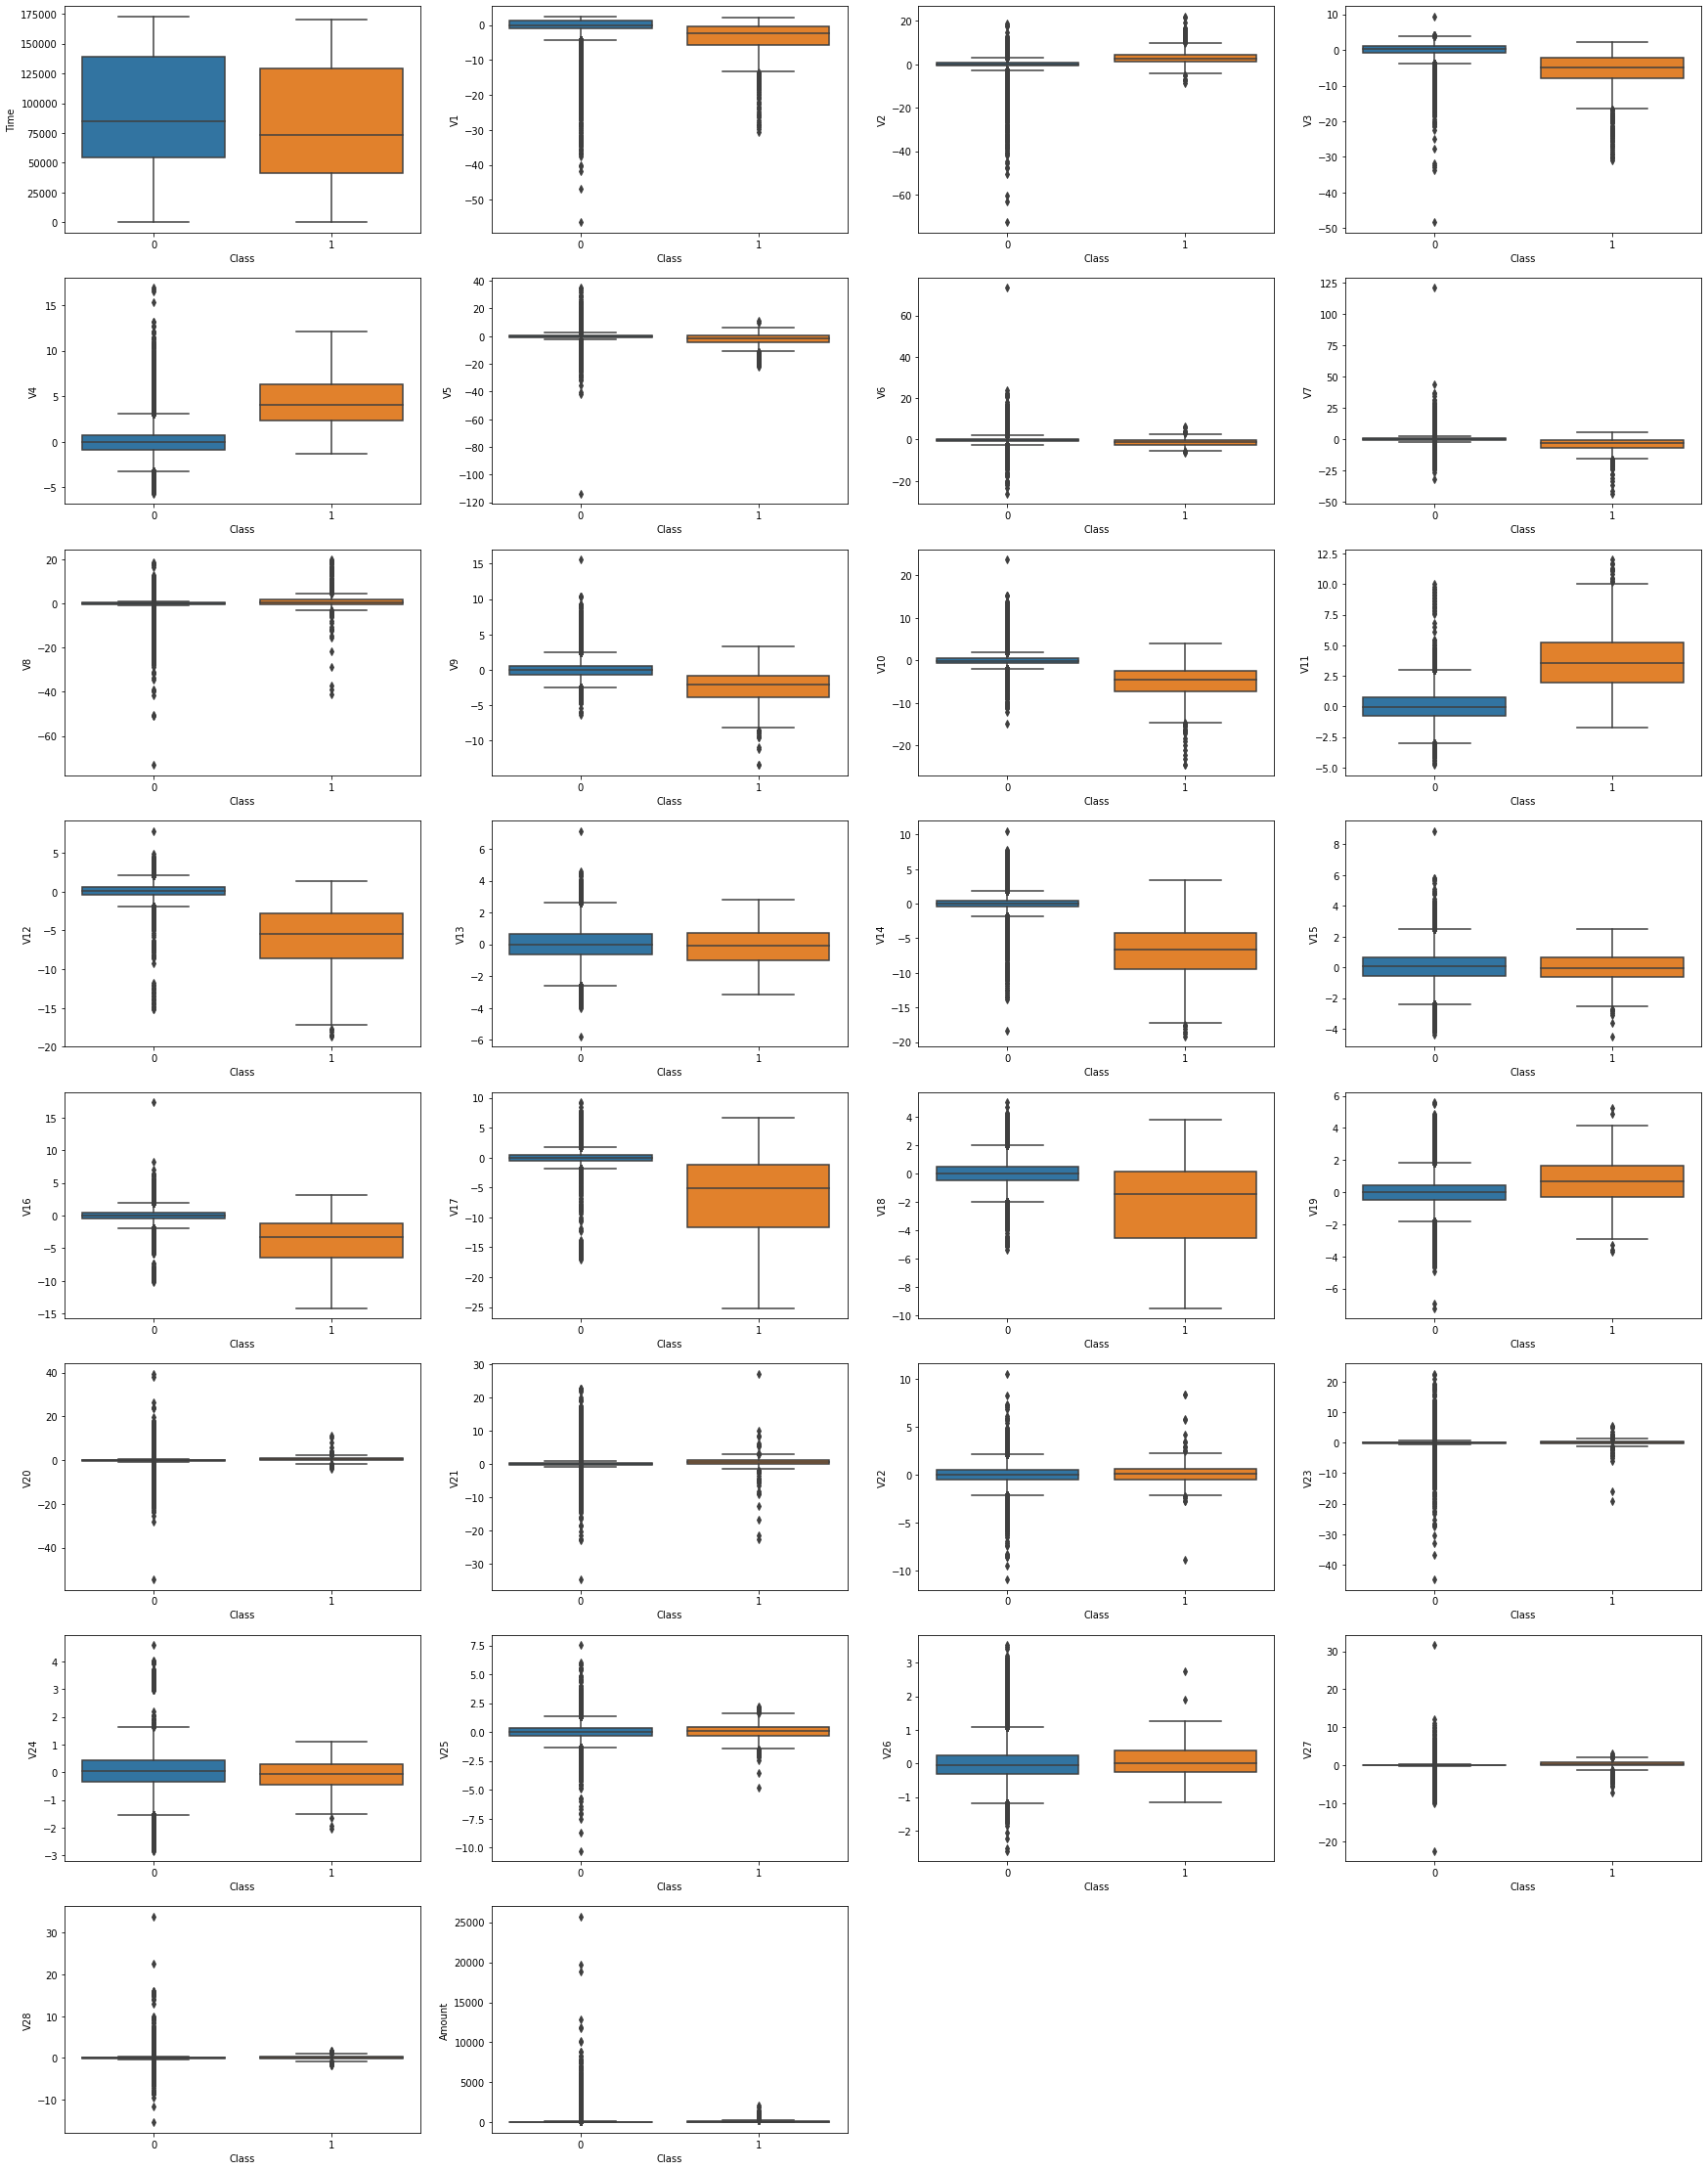

In [29]:
index = 0
plt.figure(figsize=(30,40))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(8,4,index)
        sns.boxplot(x='Class',y=feature,data=df)

---
---


## 2. Data Preprocessing

#### Scaling

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [31]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [32]:
X = df.drop("Class", axis=1)
y = df.Class

In [33]:
scaler = RobustScaler()

In [34]:
# X_scaled = scaler.fit_transform(X)

In [35]:
# X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [38]:
y_train.value_counts()

0    198277
1       331
Name: Class, dtype: int64

In [39]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [40]:
X_train_scale = pd.DataFrame(X_train_scale, index = X_train.index, columns = X_train.columns)
X_test_scale = pd.DataFrame(X_test_scale, index = X_test.index, columns = X_test.columns)

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, plot_roc_curve

***ii. Model Training***

In [42]:
log_model = LogisticRegression()
log_model.fit(X_train_scale, y_train)

LogisticRegression()

***iii. Prediction and Model Evaluating***

In [43]:
y_pred=log_model.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[84961    15]
 [   61    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.84      0.57      0.68       142

    accuracy                           1.00     85118
   macro avg       0.92      0.79      0.84     85118
weighted avg       1.00      1.00      1.00     85118




You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [44]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

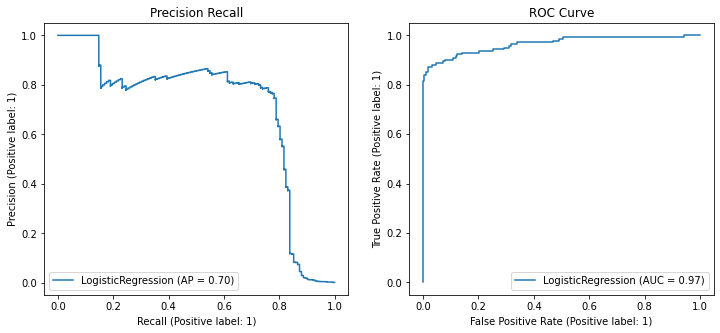

In [45]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_precision_recall_curve(log_model, X_test_scale, y_test, ax = ax[0])
ax[0].set_title('Precision Recall')
plot_roc_curve(log_model, X_test_scale, y_test, ax = ax[1])
ax[1].set_title('ROC Curve');

***v. Apply and Plot StratifiedKFold***

In [46]:
from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
def SKFold(n, model, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    accuracy = []
    precision = []
    recall = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y): 
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]    

        #sm = SMOTE(random_state=42)
        #X_smoted, y_smoted = sm.fit_resample(X_train, y_train)
        #X_train = X_smoted
        #y_train = y_smoted
        
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        
        scaler = RobustScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy.append(model.score(X_test, y_test))
        precision.append(precision_score(y_test, y_pred, pos_label=1))
        recall.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
    
    print(f'Accuracy : {accuracy} \n')
    print(f'Precision : {precision} \n')
    print(f'Recall : {recall} \n')
    print(f'F1_score 1: {f1_scores} \n')       
 
    print(f'Accuracy : %{np.mean(accuracy)*100:.2f} std %{np.std(accuracy)*100:.2f} \n')
    print(f'Precision : %{np.mean(precision)*100:.2f} std %{np.std(precision)*100:.2f} \n')
    print(f'Recall : %{np.mean(recall)*100:.2f} std %{np.std(recall)*100:.2f}\n')
    print(f'F1_score : %{np.mean(f1_scores)*100:.2f} std  %{np.std(f1_scores)*100:.2f}') 

In [47]:
SKFold(10, LogisticRegression(), X, y)

Accuracy : [0.9992246149508336, 0.9993303492757198, 0.999365594050682, 0.9989074119761745, 0.999048391076023, 0.9991893701758714, 0.9991893416043987, 0.9992245876215987, 0.9993303256731989, 0.9989426194839983] 

Precision : [0.8571428571428571, 0.9375, 0.9142857142857143, 0.8148148148148148, 0.7837837837837838, 0.9032258064516129, 0.9, 0.8205128205128205, 0.9375, 0.7741935483870968] 

Recall : [0.6382978723404256, 0.6382978723404256, 0.6808510638297872, 0.4583333333333333, 0.6041666666666666, 0.5833333333333334, 0.574468085106383, 0.6808510638297872, 0.6382978723404256, 0.5106382978723404] 

F1_score 1: [0.7317073170731707, 0.759493670886076, 0.7804878048780487, 0.5866666666666666, 0.6823529411764706, 0.7088607594936709, 0.7012987012987012, 0.7441860465116279, 0.759493670886076, 0.6153846153846153] 

Accuracy : %99.92 std %0.02 

Precision : %86.43 std %5.92 

Recall : %60.08 std %6.82

F1_score : %70.70 std  %6.04


- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [48]:
# !pip install imblearn

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)
y_smote.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [51]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [52]:
scaler = RobustScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test_smote = scaler.transform(X_test_smote)

***ii. Model Training***

In [53]:
log_model = LogisticRegression()
log_model.fit(X_train_smote, y_train_smote)

LogisticRegression()

***iii. Prediction and Model Evaluating***

In [54]:
y_pred_smote=log_model.predict(X_test_smote)
print(confusion_matrix(y_test_smote, y_pred_smote))
print(classification_report(y_test_smote,y_pred_smote))

[[84118   762]
 [ 2755 82317]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     84880
           1       0.99      0.97      0.98     85072

    accuracy                           0.98    169952
   macro avg       0.98      0.98      0.98    169952
weighted avg       0.98      0.98      0.98    169952



In [55]:
# Not apply smote to data
y_pred=log_model.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[19253 65723]
 [    2   140]]
              precision    recall  f1-score   support

           0       1.00      0.23      0.37     84976
           1       0.00      0.99      0.00       142

    accuracy                           0.23     85118
   macro avg       0.50      0.61      0.19     85118
weighted avg       1.00      0.23      0.37     85118



***iv.  Plot Precision and Recall Curve***


In [56]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

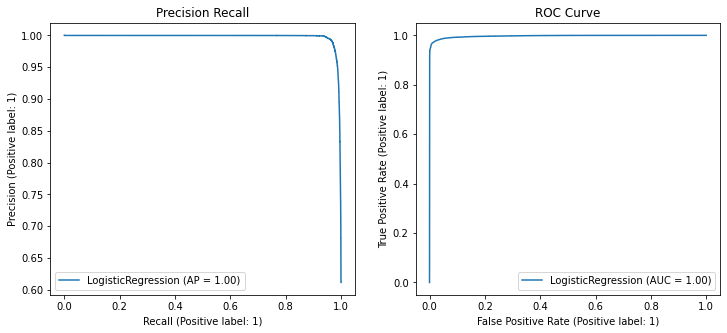

In [57]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_precision_recall_curve(log_model, X_test_smote, y_test_smote, ax = ax[0])
ax[0].set_title('Precision Recall')
plot_roc_curve(log_model, X_test_smote, y_test_smote, ax = ax[1])
ax[1].set_title('ROC Curve');

***v. Apply and Plot StratifiedKFold***

In [58]:
SKFold(10, LogisticRegression(), X_smote, y_smote)

Accuracy : [0.9781998552540997, 0.9788882808776544, 0.9794178390496197, 0.9788000211823269, 0.9797708778309298, 0.9789412366948509, 0.9788879082082965, 0.9788526037069727, 0.9784466019417476, 0.9788526037069727] 

Precision : [0.9904055032585083, 0.9915564413843088, 0.9908193877182203, 0.9904176459952992, 0.9905428818943113, 0.9905268105723687, 0.9907383958612207, 0.9909153425748308, 0.9906234161175874, 0.9905247549817366] 

Recall : [0.9657546337157987, 0.9660017652250662, 0.9678022947925861, 0.9669561533573395, 0.9687919226152651, 0.9671326696321401, 0.9668137687555163, 0.9665666372462489, 0.9660370697263901, 0.966954986760812] 

F1_score 1: [0.9779247475198856, 0.9786123032904148, 0.9791755965137877, 0.9785462924920956, 0.9795466714260218, 0.9786899594519766, 0.9786298824286174, 0.9785895557064731, 0.9781757734999196, 0.9785979705588109] 

Accuracy : %97.89 std %0.04 

Precision : %99.07 std %0.03 

Recall : %96.69 std %0.09

F1_score : %97.86 std  %0.04


### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [59]:
from sklearn.ensemble import RandomForestClassifier

#### Without Smote

In [60]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scale, y_train)

RandomForestClassifier()

In [61]:
y_pred = rf_model.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[84972     4]
 [   33   109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.77      0.85       142

    accuracy                           1.00     85118
   macro avg       0.98      0.88      0.93     85118
weighted avg       1.00      1.00      1.00     85118



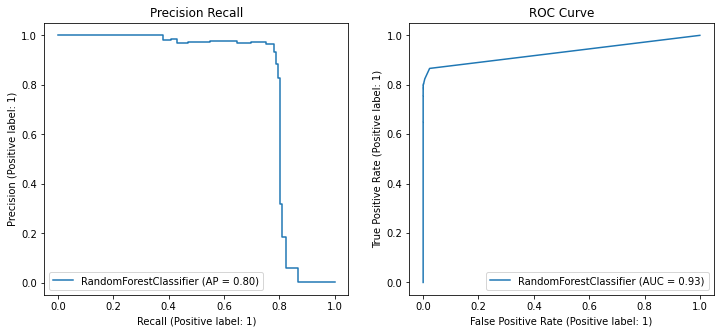

In [62]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_precision_recall_curve(rf_model, X_test_scale, y_test, ax = ax[0])
ax[0].set_title('Precision Recall')
plot_roc_curve(rf_model, X_test_scale, y_test, ax = ax[1])
ax[1].set_title('ROC Curve');

In [63]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate

In [64]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42) 
scoring = ['accuracy', 'precision','recall', 'f1']

In [65]:
scores = cross_validate(rf_model, X_test_scale, y_test, scoring = scoring, cv = cv)

In [66]:
scores = pd.DataFrame(data = scores, index=[*range(1,31)])
scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,30.932795,0.054049,0.999530,1.000000,0.714286,0.833333
2,29.181974,0.054049,0.999648,1.000000,0.785714,0.880000
3,30.284539,0.053048,0.999413,0.846154,0.785714,0.814815
4,29.976728,0.052047,0.999413,0.909091,0.714286,0.800000
5,31.523250,0.056042,0.999648,1.000000,0.785714,0.880000
6,31.282009,0.055050,0.999060,0.750000,0.642857,0.692308
7,30.550056,0.054049,0.999178,0.833333,0.666667,0.740741
8,30.194007,0.054049,0.999530,0.923077,0.800000,0.857143
9,31.897457,0.056051,0.999648,1.000000,0.785714,0.880000
10,32.029261,0.056051,0.999295,0.785714,0.785714,0.785714


In [67]:
scores.describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,30.0,30.784038,0.855053,29.181974,30.290258,30.731622,31.332747,32.856189
score_time,30.0,0.054733,0.001148,0.052047,0.054049,0.055049,0.055794,0.057043
test_accuracy,30.0,0.999444,0.000235,0.998825,0.999324,0.999530,0.999530,0.999883
test_precision,30.0,0.906995,0.096821,0.642857,0.836538,0.919872,1.000000,1.000000
test_recall,30.0,0.752063,0.088479,0.600000,0.714286,0.785714,0.785714,0.928571
test_f1,30.0,0.818523,0.073480,0.642857,0.783385,0.833333,0.864286,0.962963


#### Feature Importance

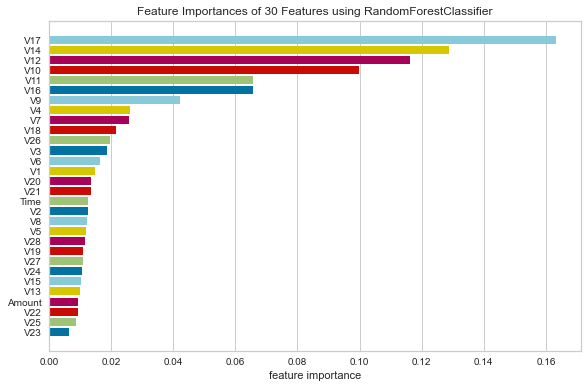

<AxesSubplot:title={'center':'Feature Importances of 30 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [68]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(rf_model, labels=X.columns, relative = False)
visualizer = RadViz(size=(600, 400))
viz.fit(X_train_scale, y_train)
viz.show()

In [69]:
feats = pd.DataFrame(index=X.columns, data= rf_model.feature_importances_, columns=['Importance'])
feats

,Importance
Time,0.012592
V1,0.014928
V2,0.012516
V3,0.018714
V4,0.026159
V5,0.011938
V6,0.016550
V7,0.025859
V8,0.012296
V9,0.042326


In [70]:
imp_feats = feats.sort_values("Importance")

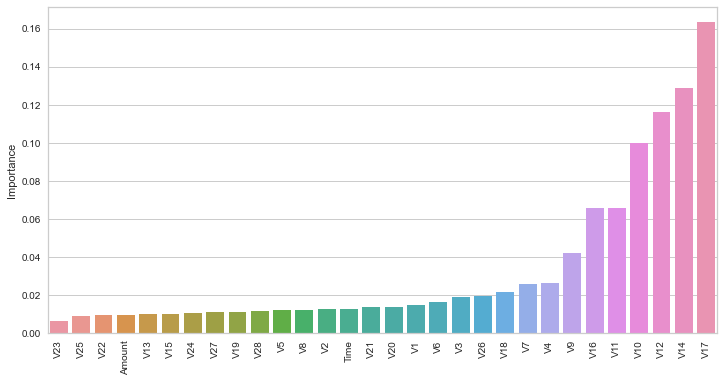

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

#### With Smote

In [72]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

***ii. Prediction and Model Evaluating***

In [73]:
y_pred_smote=rf_model.predict(X_test_smote)
print(confusion_matrix(y_test_smote, y_pred_smote))
print(classification_report(y_test_smote,y_pred_smote))

[[84859    21]
 [    0 85072]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84880
           1       1.00      1.00      1.00     85072

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



In [74]:
# Not apply smote to data
y_pred=rf_model.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[83216  1760]
 [   41   101]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.05      0.71      0.10       142

    accuracy                           0.98     85118
   macro avg       0.53      0.85      0.55     85118
weighted avg       1.00      0.98      0.99     85118



***iii. Plot Precision and Recall Curve***


In [75]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

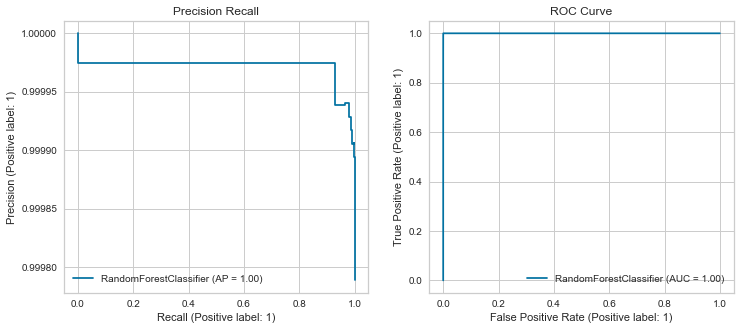

In [76]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_precision_recall_curve(rf_model, X_test_smote, y_test_smote, ax = ax[0])
ax[0].set_title('Precision Recall')
plot_roc_curve(rf_model, X_test_smote, y_test_smote, ax = ax[1])
ax[1].set_title('ROC Curve');

***iv. Apply and Plot StratifiedKFold***

In [77]:
from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
def SKFold(n, model, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    accuracy = []
    precision = []
    recall = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y): 
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]    

        #sm = SMOTE(random_state=42)
        #X_smoted, y_smoted = sm.fit_resample(X_train, y_train)
        #X_train = X_smoted
        #y_train = y_smoted
        
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        
        scaler = RobustScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy.append(model.score(X_test, y_test))
        precision.append(precision_score(y_test, y_pred, pos_label=1))
        recall.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
    
    print(f'Accuracy : {accuracy} \n')
    print(f'Precision : {precision} \n')
    print(f'Recall : {recall} \n')
    print(f'F1_score 1: {f1_scores} \n') 
        
 
    print(f'Accuracy : %{np.mean(accuracy)*100:.2f} std %{np.std(accuracy)*100:.2f} \n')
    print(f'Precision : %{np.mean(precision)*100:.2f} std %{np.std(precision)*100:.2f} \n')
    print(f'Recall : %{np.mean(recall)*100:.2f} std %{np.std(recall)*100:.2f}\n')
    print(f'F1_score : %{np.mean(f1_scores)*100:.2f} std  %{np.std(f1_scores)*100:.2f}') 

In [78]:
SKFold(10, RandomForestClassifier(), X_smote, y_smote)

Accuracy : [0.9999117403046724, 0.9999470441828034, 0.9999117403046724, 0.9999470441828034, 0.9998234806093449, 0.999858784487476, 0.999982347749338, 0.9998058252427184, 0.9999117387466901, 0.9999117387466901] 

Precision : [0.9998235086480762, 0.9998940977125106, 0.9998235086480762, 0.9998941014508101, 0.9996470920383964, 0.9997176537022658, 0.9999646967450398, 0.999611801242236, 0.9998235086480762, 0.9998235086480762] 

Recall : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 

F1_score 1: [0.9999117465360515, 0.9999470460522832, 0.9999117465360515, 0.9999470479216309, 0.9998235148776958, 0.999858806918461, 0.9999823480609346, 0.9998058629392351, 0.9999117465360515, 0.9999117465360515] 

Accuracy : %99.99 std %0.01 

Precision : %99.98 std %0.01 

Recall : %100.00 std %0.00

F1_score : %99.99 std  %0.01


### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPClassifier

***ii. Define Model***

In [80]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(units=1,activation='sigmoid'))

# opt = Adam(learning_rate=0.001)
early_stop = EarlyStopping(monitor="val_loss", verbose =2, patience = 10, restore_best_weights=True)

***iii. Compile Model***

In [81]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy"])

***iv. Fit Model***

#### Without Smote

In [93]:
model.fit(x=X_train_scale.values, 
          y=y_train.values, 
          batch_size = 512,
          epochs=300,
          validation_data=(X_test_scale.values, y_test.values), callbacks = [early_stop], verbose=1)

Epoch 1/300
388/388 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9822 - val_loss: 0.0067 - val_accuracy: 0.9983
Epoch 2/300
388/388 [==============================] - 1s 2ms/step - loss: 0.0094 - accuracy: 0.9985 - val_loss: 0.0056 - val_accuracy: 0.9983
Epoch 3/300
388/388 [==============================] - 1s 2ms/step - loss: 0.0072 - accuracy: 0.9987 - val_loss: 0.0047 - val_accuracy: 0.9983
Epoch 4/300
388/388 [==============================] - 1s 2ms/step - loss: 0.0067 - accuracy: 0.9986 - val_loss: 0.0042 - val_accuracy: 0.9990
Epoch 5/300
388/388 [==============================] - 1s 2ms/step - loss: 0.0062 - accuracy: 0.9988 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 6/300
388/388 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 0.9989 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 7/300
388/388 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 0.9989 - val_loss: 0.0037 - val_accuracy: 0.9994

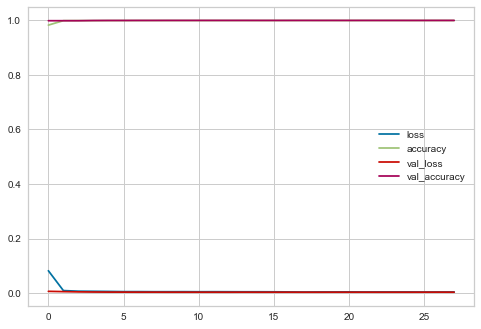

In [94]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot();

In [95]:
y_pred = model.predict_classes(X_test_scale.values)
print(confusion_matrix(y_test.values,y_pred))
print(classification_report(y_test.values, y_pred))

[[84957    19]
 [   31   111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.85      0.78      0.82       142

    accuracy                           1.00     85118
   macro avg       0.93      0.89      0.91     85118
weighted avg       1.00      1.00      1.00     85118



#### With Smote

In [96]:
X_train_smote # array seklinde olmalı

array([[ 0.47823143,  0.60489054, -0.9557112 , ..., -0.23442314,
        -0.14923977,  3.37924411],
       [ 0.09476579,  0.75014708, -0.41248725, ..., -0.03527652,
        -0.22666095, -0.21394059],
       [-0.3045047 ,  0.54983581, -0.40001654, ..., -0.14501214,
        -0.20059638, -0.16203846],
       ...,
       [ 0.16314093, -3.13728754,  2.1931179 , ..., -4.07252227,
        -2.15279446,  0.07813467],
       [ 0.00804545,  0.55198616, -0.36024648, ..., -0.02901146,
        -0.049427  , -0.219027  ],
       [-0.03015612,  0.08736809, -0.05842326, ..., -0.38837385,
        -0.32247299, -0.26573892]])

In [97]:
y_train_smote.values # array seklinde olmalı

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [102]:
model.fit(x=X_train_smote, 
          y=y_train_smote.values, 
          batch_size = 512,
          epochs=100,
          validation_data=(X_test_smote, y_test_smote.values), verbose=1, callbacks = [early_stop])

Epoch 1/100
775/775 [==============================] - 2s 2ms/step - loss: 0.0203 - accuracy: 0.9931 - val_loss: 0.0073 - val_accuracy: 0.9981
Epoch 2/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0198 - accuracy: 0.9932 - val_loss: 0.0074 - val_accuracy: 0.9982
Epoch 3/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0197 - accuracy: 0.9933 - val_loss: 0.0086 - val_accuracy: 0.9973
Epoch 4/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0201 - accuracy: 0.9931 - val_loss: 0.0085 - val_accuracy: 0.9974
Epoch 5/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 0.0067 - val_accuracy: 0.9983
Epoch 6/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0199 - accuracy: 0.9930 - val_loss: 0.0074 - val_accuracy: 0.9982
Epoch 7/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0195 - accuracy: 0.9932 - val_loss: 0.0078 - val_accuracy: 0.9981

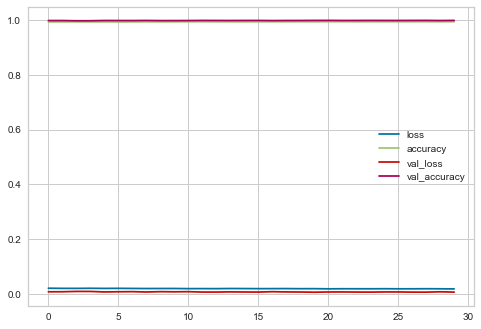

In [104]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot();

***v. Prediction and Model Evaluating***

In [105]:
y_pred_smote = model.predict_classes(X_test_smote)
print(confusion_matrix(y_test_smote.values,y_pred_smote))
print(classification_report(y_test_smote.values, y_pred_smote))

[[84766   114]
 [  125 84947]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84880
           1       1.00      1.00      1.00     85072

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



In [106]:
# Not apply smote to data
y_pred = model.predict_classes(X_test_scale.values)
print(confusion_matrix(y_test.values,y_pred))
print(classification_report(y_test.values, y_pred))

[[59492 25484]
 [    6   136]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     84976
           1       0.01      0.96      0.01       142

    accuracy                           0.70     85118
   macro avg       0.50      0.83      0.42     85118
weighted avg       1.00      0.70      0.82     85118



***vi. Plot Precision and Recall Curve***

In [ ]:
# plot_precision_recall_curve(model, X_test_scale.values, y_test.values);

#### Final Model

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scale, y_train)

RandomForestClassifier()

In [109]:
y_pred = rf_model.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[84971     5]
 [   33   109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.77      0.85       142

    accuracy                           1.00     85118
   macro avg       0.98      0.88      0.93     85118
weighted avg       1.00      1.00      1.00     85118



#### Cross Validate

In [110]:
from sklearn.model_selection import cross_val_score, cross_validate

In [111]:
sklearn.metrics.SCORERS.keys()

<IPython.core.display.Javascript object>

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [112]:
rf_model = RandomForestClassifier()
scores = cross_validate(estimator = rf_model, X = X_train_scale, y = y_train, cv = 10, scoring = ['accuracy', 'precision','recall','f1'])

In [113]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,100.011010,0.135461,0.999597,0.903226,0.848485,0.875000
2,103.922964,0.142129,0.999497,0.896552,0.787879,0.838710
3,101.234128,0.138126,0.999396,0.956522,0.666667,0.785714
4,101.285296,0.136655,0.999648,0.933333,0.848485,0.888889
5,110.454267,0.143899,0.999497,0.925926,0.757576,0.833333
6,101.484877,0.140128,0.999597,1.000000,0.757576,0.862069
7,100.081892,0.137630,0.999799,0.967742,0.909091,0.937500
8,100.984882,0.139126,0.999698,0.966667,0.852941,0.906250
9,101.302901,0.140127,0.999295,0.952381,0.606061,0.740741
10,103.519521,0.138126,0.999396,0.956522,0.666667,0.785714


In [114]:
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.999542
test_precision    0.945887
test_recall       0.770143
test_f1           0.845392
dtype: float64

#### GridSearch

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
param_grid = {'n_estimators':[20, 50],
             'max_features':[5, 6],
             'max_depth':[8,10],
             'min_samples_split':[3,4]
             } 

In [117]:
rf_model = RandomForestClassifier(random_state=42)

In [118]:
grid_rf_model = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring = "f1", n_jobs=-1, verbose=1)

In [119]:
grid_rf_model.fit(X_train_scale, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [5, 6],
                         'min_samples_split': [3, 4],
                         'n_estimators': [20, 50]},
             scoring='f1', verbose=1)

In [120]:
grid_rf_model.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_split': 4,
 'n_estimators': 20}

In [121]:
y_pred = grid_rf_model.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[84972     4]
 [   34   108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.76      0.85       142

    accuracy                           1.00     85118
   macro avg       0.98      0.88      0.93     85118
weighted avg       1.00      1.00      1.00     85118



## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to *Pycharm* and create your web app with Flask API.

### Save and Export the Model as .pkl


In [122]:
import pickle

In [123]:
scaler = RobustScaler()

In [124]:
X_scale = scaler.fit_transform(X)

In [125]:
rf_model = RandomForestClassifier(n_estimators=20, max_depth=10, max_features=5, min_samples_split=4)

In [126]:
rf_model.fit(X_scale, y)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_split=4,
                       n_estimators=20)

In [ ]:
pickle.dump(rf_model, open("rf_final_model.pkl", 'wb'))

In [127]:
X = df.drop("Class", axis=1)
y = df.Class

In [128]:
scaler = RobustScaler().fit(X)

In [ ]:
pickle.dump(scaler, open("scaler.pkl", 'wb'))

### Save and Export Variables as .pkl

In [129]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [130]:
list(X.columns)

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [ ]:
pickle.dump(list(X.columns), open("Xcolums.pkl","wb"))

### Final Model Test

In [131]:
import pickle
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [132]:
rf = pickle.load(open("rf_final_model.pkl", "rb"))

In [133]:
scaler = pickle.load(open("scaler.pkl", "rb"))

In [134]:
df = pd.read_csv("creditcard.csv")

In [135]:
X = df.drop("Class", axis=1)
y = df.Class

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [138]:
X_test = scaler.transform(X_test)

In [139]:
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[85295     0]
 [   26   122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      0.82      0.90       148

    accuracy                           1.00     85443
   macro avg       1.00      0.91      0.95     85443
weighted avg       1.00      1.00      1.00     85443



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___